In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
import os

In [17]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.13.1
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens   

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [19]:
tf.config.list_physical_devices('GPU')

[]

In [21]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 6.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 4.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
import imghdr

/var/folders/w8/5_mppv150n55pmss0t8rdy_h0000gn/T/ipykernel_24969/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [114]:
data_dir = 'data' 

In [115]:
image_exts = ['png']

In [116]:
os.listdir(data_dir)

['trex',
 '.DS_Store',
 'brontosaurus',
 'triceratops',
 'ankylosaurus',
 'pterodactyl']

In [117]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 200 files belonging to 5 classes.


In [118]:
data_iterator = data.as_numpy_iterator()

In [119]:
batch = data_iterator.next()


In [120]:
# 0 = ankylosaurus
# 1 = brontosaurus
# 2 = pterodactyl
# 3 = trex
# 4 = triceratops

batch[1]

array([1, 0, 2, 4, 4, 1, 0, 1, 4, 1, 0, 1, 1, 1, 3, 2, 4, 0, 3, 0, 3, 4,
       3, 0, 1, 2, 2, 2, 2, 2, 1, 0], dtype=int32)

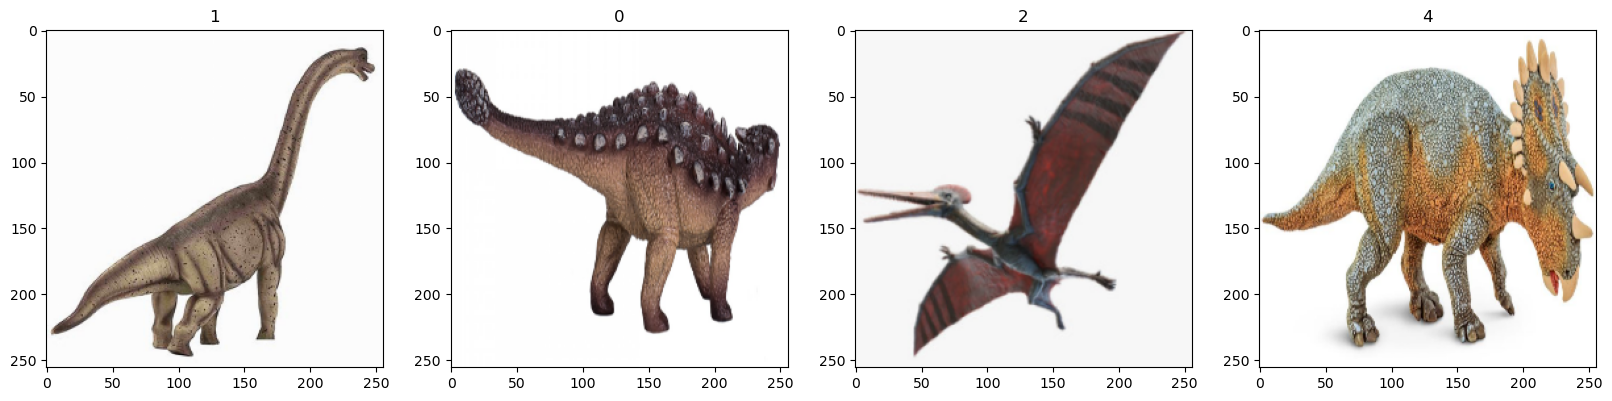

In [121]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [122]:
data = data.map(lambda x,y: (x/255, y))

In [123]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [124]:
len(data)

7

In [79]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [104]:
train_size

4

In [105]:
data = data.shuffle(buffer_size=4)

In [106]:
# data should be shuffled
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [107]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [108]:
model = Sequential()

In [109]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [112]:
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
4/4 [==============================] - 2s 421ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss: 0.0000e+00 - val_accuracy: 0.2656
Epoch 2/20
4/4 [==============================] - 1s 334ms/step - loss: 0.0000e+00 - accuracy: 0.2344 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 3/20
4/4 [==============================] - 1s 341ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss: 0.0000e+00 - val_accuracy: 0.1750
Epoch 4/20
4/4 [==============================] - 1s 287ms/step - loss: 0.0000e+00 - accuracy: 0.2019 - val_loss: 0.0000e+00 - val_accuracy: 0.2031
Epoch 5/20
4/4 [==============================] - 1s 327ms/step - loss: 0.0000e+00 - accuracy: 0.2188 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 6/20
4/4 [==============================] - 1s 330ms/step - loss: 0.0000e+00 - accuracy: 0.2266 - val_loss: 0.0000e+00 - val_accuracy: 0.2656
Epoch 7/20
4/4 [==============================] - 1s 334ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss

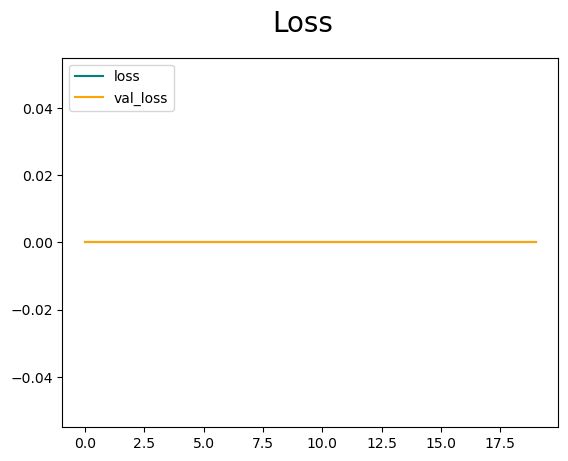

In [113]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
